# Mandelbrot set

It  is the set of complex numbers c for which the function $f_{c}(z)=z^{2}+c$ does not diverge when iterated from $z=0$ remains bounded in absolute value.  
Its definition is credited to Adrien Douady who named it in tribute to the mathematician Benoit Mandelbrot, a pioneer of fractal geometry.

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = 12,12
np.random.seed(2)

There are many ways to generate a mandelbrot. Let's start but the basic one

In [ ]:
def N(z,c):
    n = 0
    while abs(z) < 2 and n < 100:
        z = z**2 + c
        n += 1
    return n

def mandelbrot(resolution=1000):
    X = -2
    Y = 2
    step = 4.0/resolution
    data = []
    while Y >= -2:
        data.append([])
        while X <= 2:
            data[-1].append(N(0,X + 1j * Y))
            X += step
        Y -= step
        X = -2
    sns.heatmap(data, xticklabels = False, yticklabels = False, vmax = 20, cbar=False )

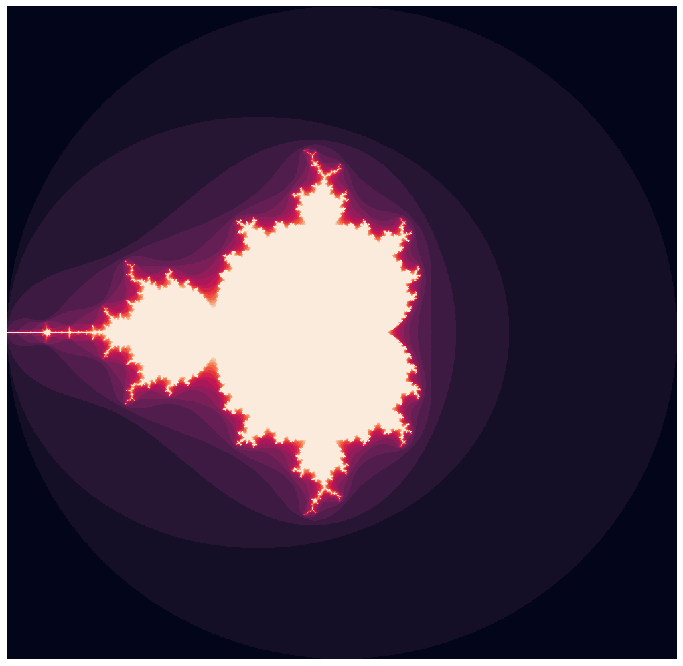

In [79]:
mandelbrot(1000)

The following code is a bit more elaborated:

In [80]:
def bounding_region(x, y, x_test,y_test):
    # test circular region
    if ((x_test + 1)**2 + y_test**2) <= 0.25**2:
        return True
    # pesky origin
    if (x_test - 0.25) == 0 and y_test == 0:
        return True
    # test cardtoid region
    else:
        r_test = np.sqrt((x_test-0.25)**2 + y_test**2)
        cos_phi_test = (x_test-0.25) / r_test
        a = 0.5
        if r_test <= a*(1-cos_phi_test):
            return True
        return False

def mandelbrot(x_min, x_max, y_min, y_max, iteration=1000):
    
    r_max = 2
    r_max_squared = r_max**2

    N_grid = 1000
    scale_factor = (x_max - x_min) / (y_max - y_min)
    y_slope  = (y_max - y_min)/N_grid
    x_slope  = (x_max - x_min)/(scale_factor*N_grid)

    x_range = np.arange(int(scale_factor*N_grid))
    y_range = np.arange(N_grid)

    Mset = np.zeros((N_grid,int(scale_factor*N_grid))) # np.zeros((num of rows, num of columns))
    
    for y in y_range:
        y_value = y_min + y_slope*y
        for x in x_range:
            x_value = x_min + x_slope*x
            # test if point inside know region
            if bounding_region(x,y,x_value,y_value) == True:
                Mset[y,x] = np.log(1001)
            else:
                # test 
                n = 0
                z0 = np.complex(0,0)
                C = np.complex(x_value,y_value)
                z = z0**2 + C
                z_test_mag_squared = z.real**2 + z.imag**2
                while z_test_mag_squared <= r_max_squared and n <= iteration:
                    z = z**2 + C
                    z_test_mag_squared = z.real**2 + z.imag**2
                    n = n + 1
                # update value in Mset
                Mset[y,x] = np.log(n+1)
    
    return Mset


In [81]:
x_min = -1.6
x_max = 1.2
y_min = -1.2
y_max = 1.2

Mset = mandelbrot(x_min, x_max, y_min, y_max)

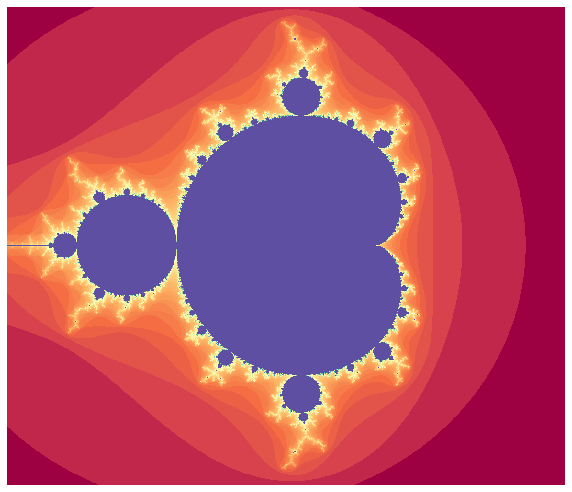

In [86]:
plt.rcParams['figure.figsize'] = 10, 20
# extent=[horizontal_min,horizontal_max,vertical_min,vertical_max].

plt.imshow(Mset,cmap='Spectral', interpolation='none', extent=[x_min,x_max,y_min,y_max], origin='lower')
plt.axis('off');

In [97]:
# another mandelbrot model

def mandel(x_min, x_max, y_min, y_max, N, x_pix, y_pix, R, cmap=cmap):
    plt.rcParams['figure.figsize'] = 10, 20
    x = np.linspace(x_min, x_max, x_pix).astype(np.float32) 
    y = np.linspace(y_max, y_min, y_pix).reshape(y_pix, 1).astype(np.float32) * 1j
                     # below of y-axis is smaller
    c = x + y   #broadcasting by numpy 
    counter = np.zeros_like(c, dtype=np.uint32)
    z = np.zeros_like(c)        
    boolean = np.zeros_like(c, dtype=bool)
    for i in range(N):
        z[boolean] = z[boolean]**2 + c[boolean]
        boolean = np.less(abs(z), R)
        if not boolean.any():
            break
        counter[boolean] += 1
    return counter

def draw_md(x_min, x_max, y_min, y_max, N, 
            x_pix=1000, y_pix=1000, R=3, cmap='viridis'):
    counter = mandel(x_min, x_max, y_min, y_max, N, x_pix, y_pix, R)
    fig = plt.figure(figsize = (10, 20))
    ax = fig.add_subplot(1,1,1)
    ax.set_xticks(np.linspace(x_min, x_max, 5))
    ax.set_yticks(np.linspace(y_min, y_max, 5))
    plt.imshow(counter, extent=[x_min, x_max, y_min, y_max], cmap=cmap)
    plt.axis('off');

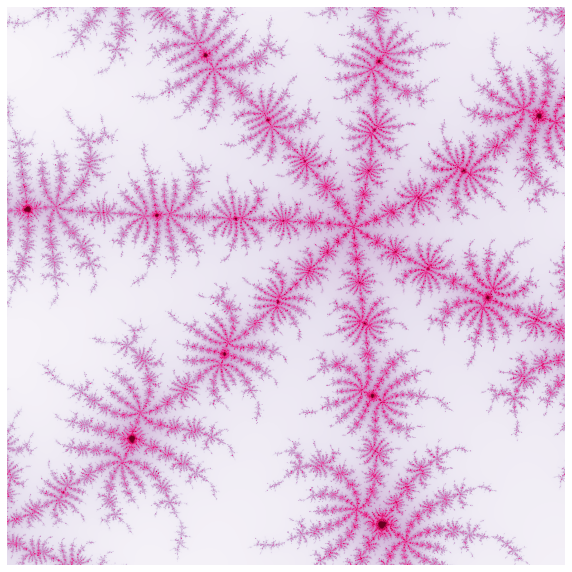

In [165]:
x_min = -1.245
x_max = -1.243
y_min =  0.115
y_max =  0.117
N = 400
x_pix = 1000
y_pix = 1000

draw_md(x_min, x_max, y_min, y_max, N, x_pix, y_pix, cmap=cmap)

In [176]:
min_val, max_val = 0.3,.65
n = 10
orig_cmap = plt.cm.autumn_r
colors = orig_cmap(np.linspace(min_val, max_val, n))
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("mycmap", colors)

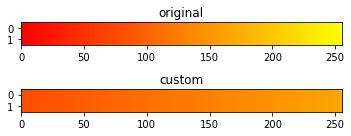

In [174]:
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(5,2))
ax1.imshow(gradient, cmap=orig_cmap, aspect='auto')
ax1.set_title('original')
ax2.imshow(gradient, cmap=cmap, aspect='auto')
ax2.set_title('custom')
plt.tight_layout()

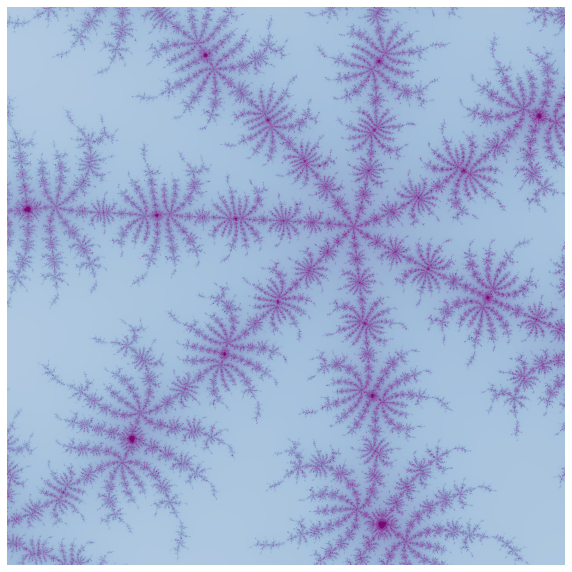

In [166]:
draw_md(x_min, x_max, y_min, y_max, N, x_pix, y_pix, cmap=cmap)

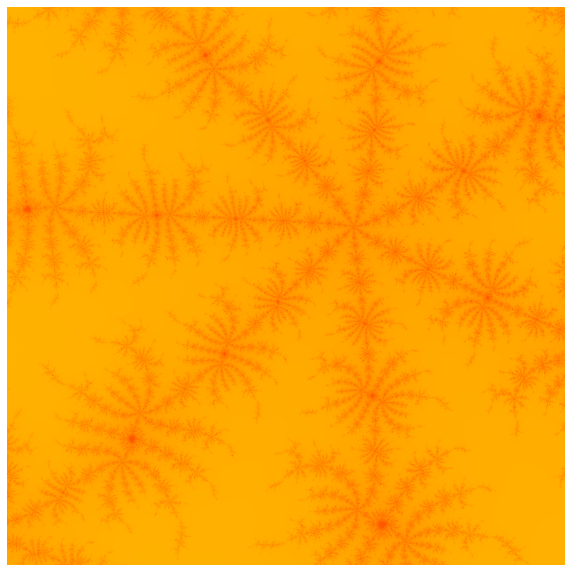

In [177]:
draw_md(x_min, x_max, y_min, y_max, N, x_pix, y_pix, cmap=cmap)

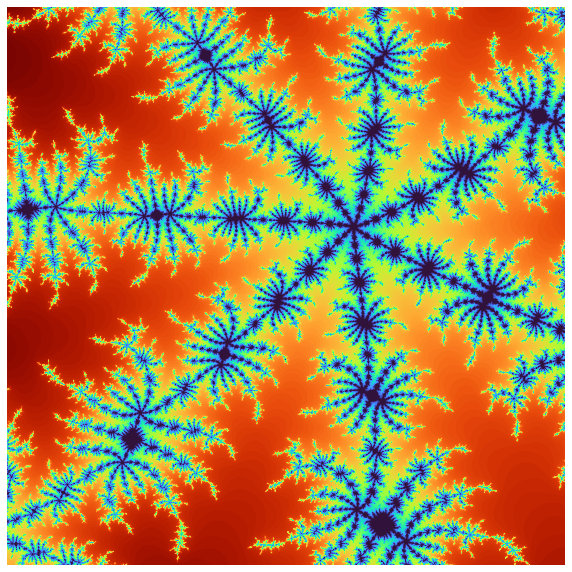

In [180]:
x_min = -1.245
x_max = -1.243
y_min =  0.115
y_max =  0.117
N = 200
x_pix = 1000
y_pix = 1000
draw_md(x_min, x_max, y_min, y_max, N, x_pix, y_pix, cmap='turbo_r')